# Tinder Reviews Sentiment Analysis using Python


Tinder is one of the most popular dating applications. It connects people having similar interests. To check whether Tinder helps people find partners, we can analyze the sentiments of people about Tinder. There are a lot of reviews on the Google Play Store about Tinder. We can use that data to analyze the sentiments of Tinder users. So if you want to learn how to analyze Tinder reviews, this article is for you. In this article, I will take you through the task of Tinder reviews sentiment analysis using Python.

## Tinder Reviews Sentiment Analysis using Python

The dataset I am using for the task of Tinder reviews sentiment analysis is downloaded from Kaggle. It was collected from Tinder reviews on the Google Play store.

Now let’s import the necessary Python libraries and the dataset to begin this task:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId          userName  ... repliedAt appVersion
0  53b5af03-9c0e-4334-beff-37846e78b29e  Mlungisi Zisongo  ...       NaN     15.7.1
1  deaeb837-3b72-40bf-a3f0-d8cc0100b3f4             Jason  ...       NaN     15.7.1
2  12900440-8b13-447c-83da-7fe0a04c99f2            Bill F  ...       NaN     15.7.1
3  581f07ae-eacb-4b6b-82f0-51719f4f0bed            John A  ...       NaN     15.7.1
4  4a2c271d-4b60-41dc-ab77-0ce3d53c75ed           Shaun S  ...       NaN     15.7.1

[5 rows x 11 columns]


On the first impressions of this dataset, I can see some null values in some columns. To analyze the Tinder reviews, we only need the content column. So let’s create a new dataset with the content column and move further:

In [2]:
data = data[["content"]]

Now let’s see if we have null values in the content column:



In [3]:
data.isnull().sum()

content    0
dtype: int64

The content column also contains null values, let’s remove the null values and move on:



In [4]:
data = data.dropna()

Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:



In [5]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now let’s have a look at the kind of words people use in the reviews of Tinder:

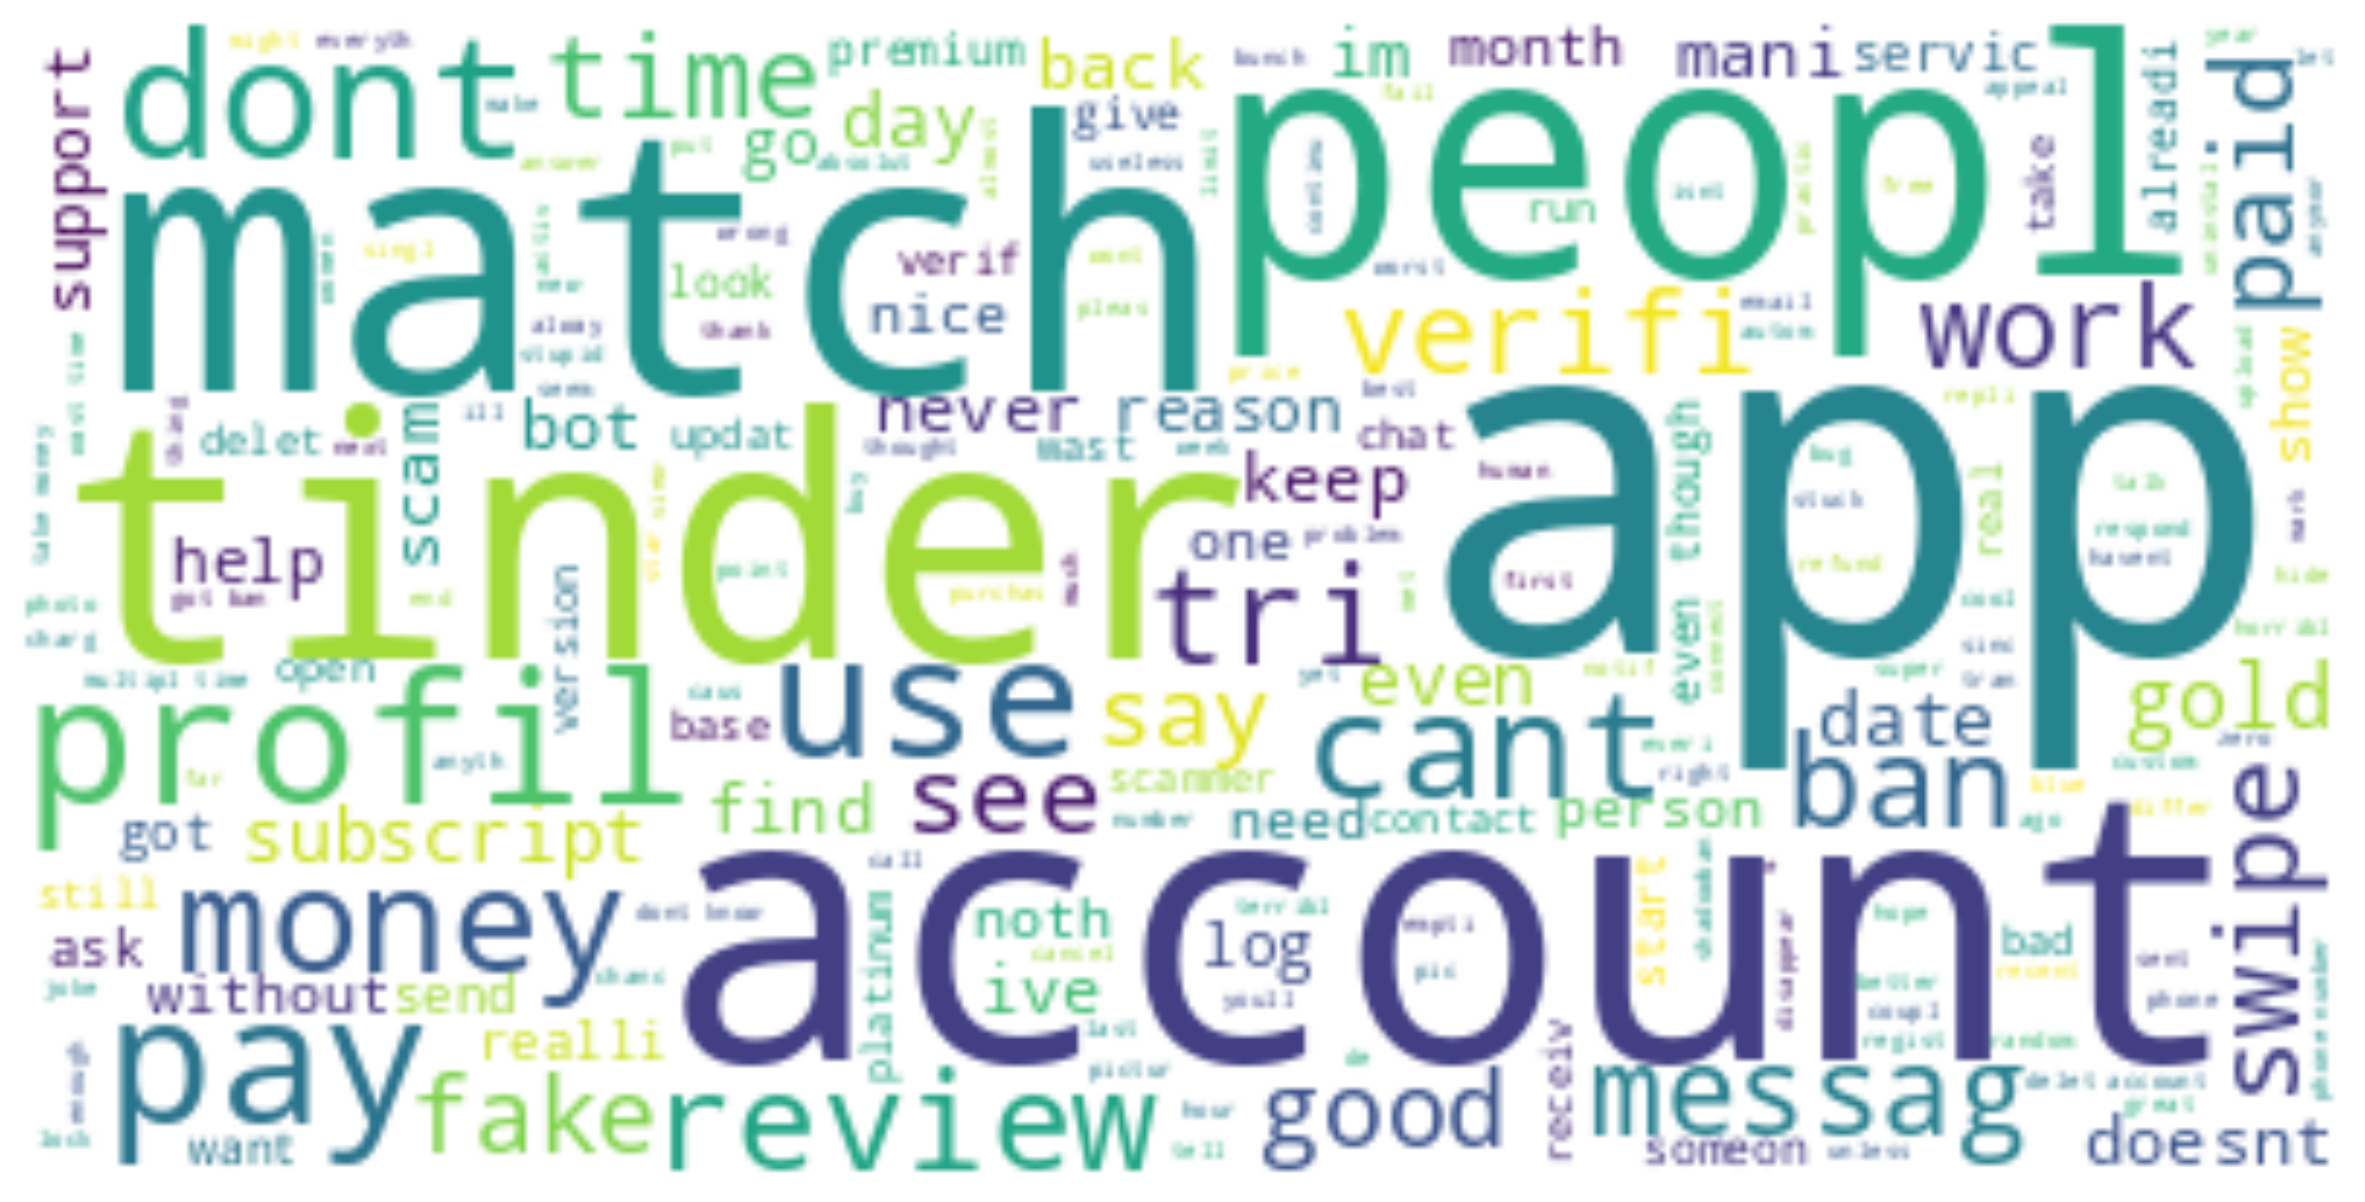

In [6]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                             content  ...  Neutral
0                                               best  ...    0.000
1  most scammer want use whatsapp  scammer snap  ...  ...    0.707
2  far met one match other messag match disappear...  ...    0.699
3  like dont seem send see peopl multipl time go ...  ...    0.605
4  damn someon realli fd time look rate tank hell...  ...    0.633

[5 rows x 4 columns]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...


Now let’s have a look at the kind of words people use in the positive reviews of Tinder:

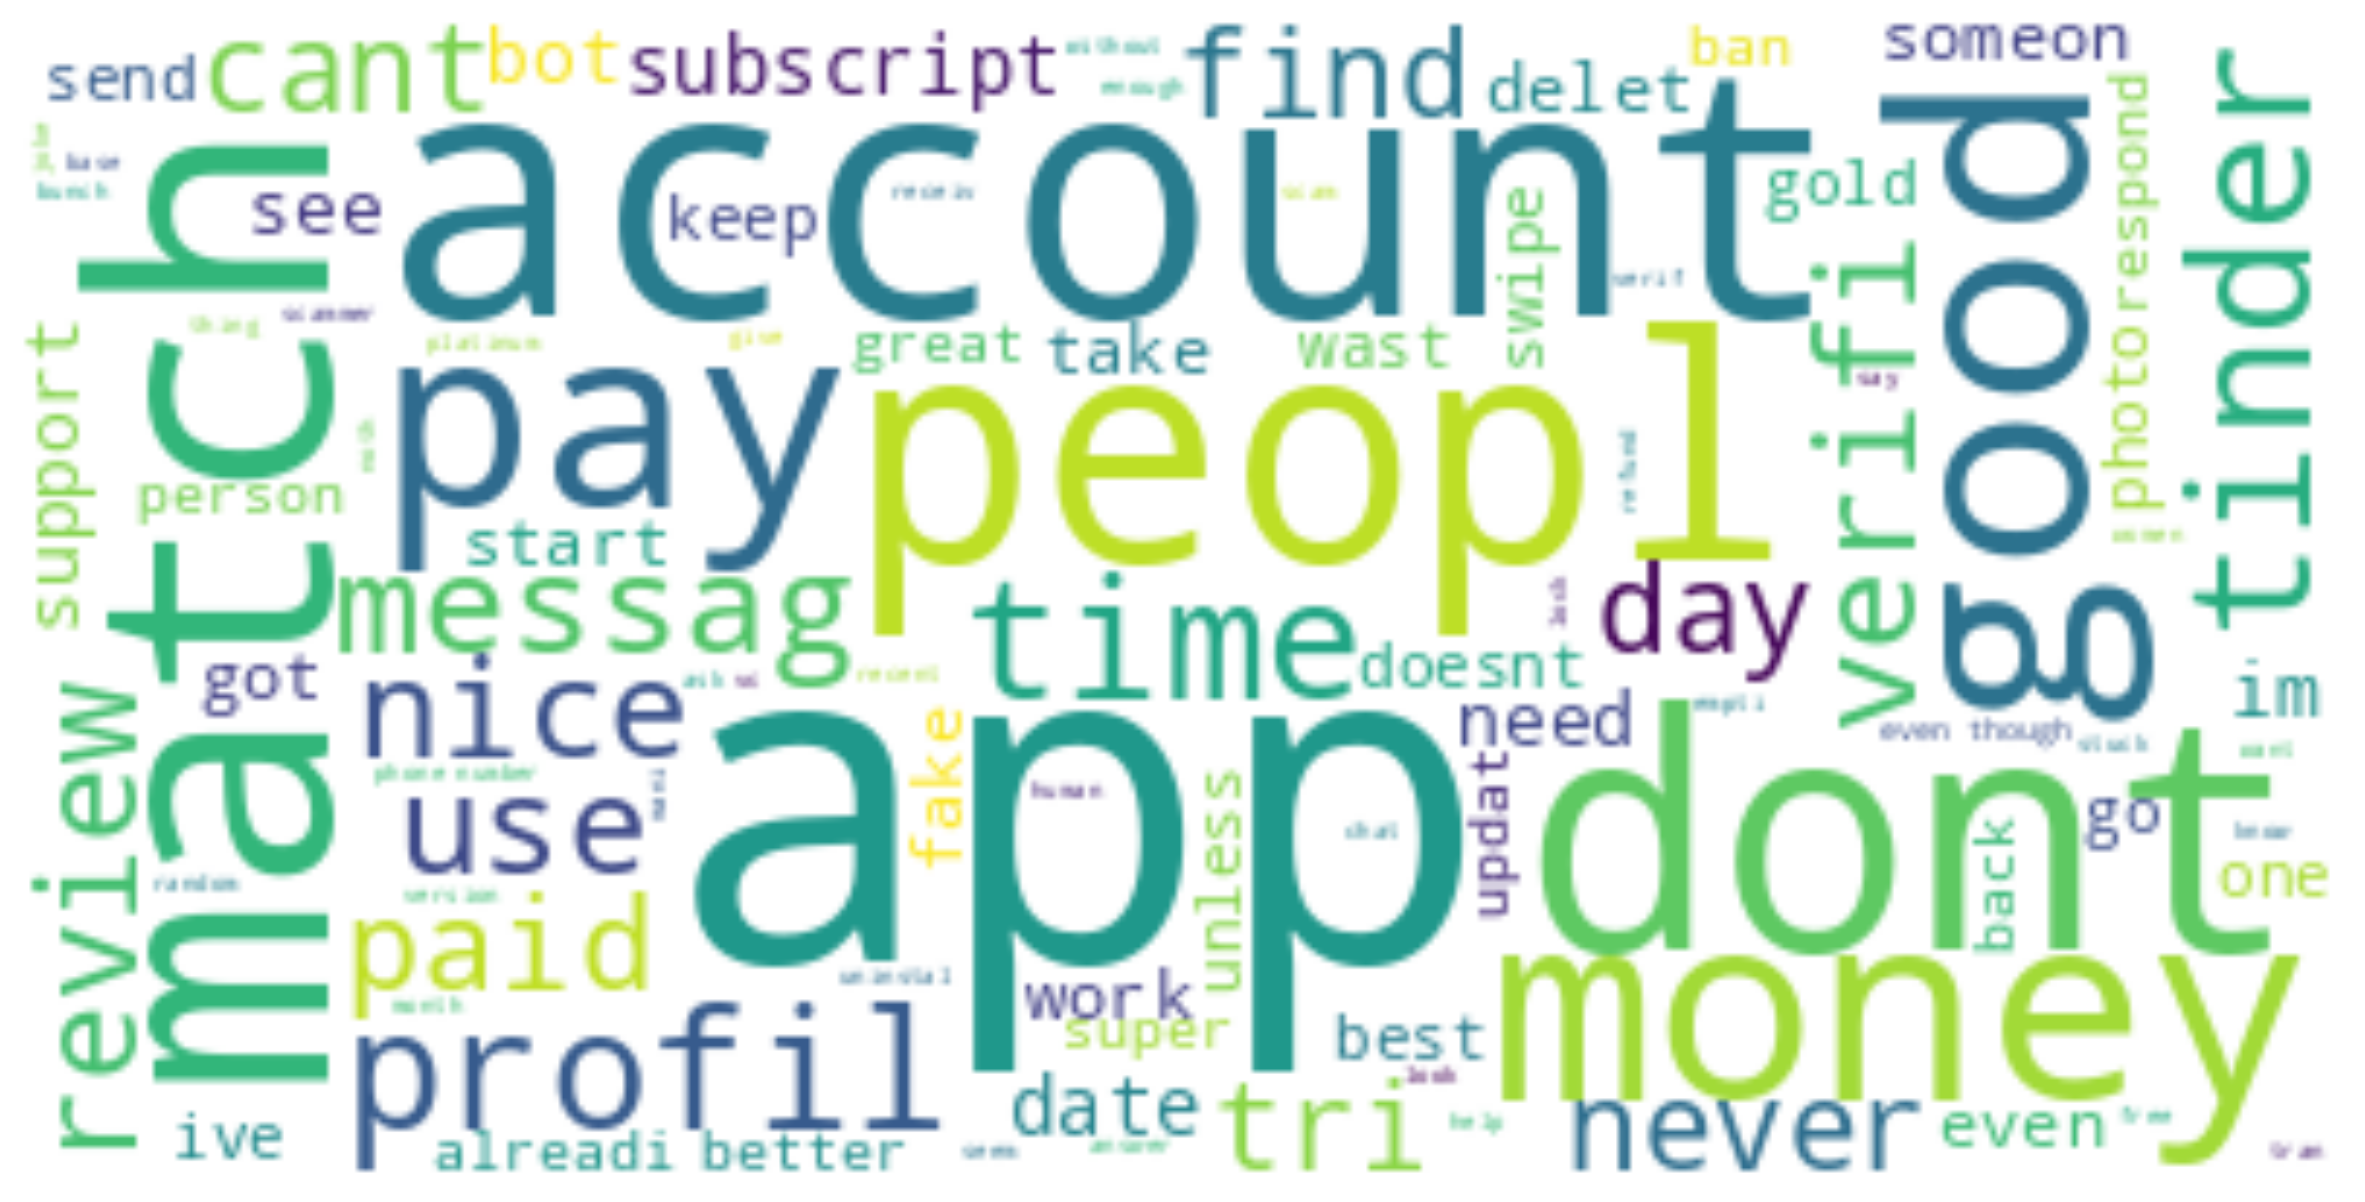

In [13]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people use in the negative reviews of Tinder:



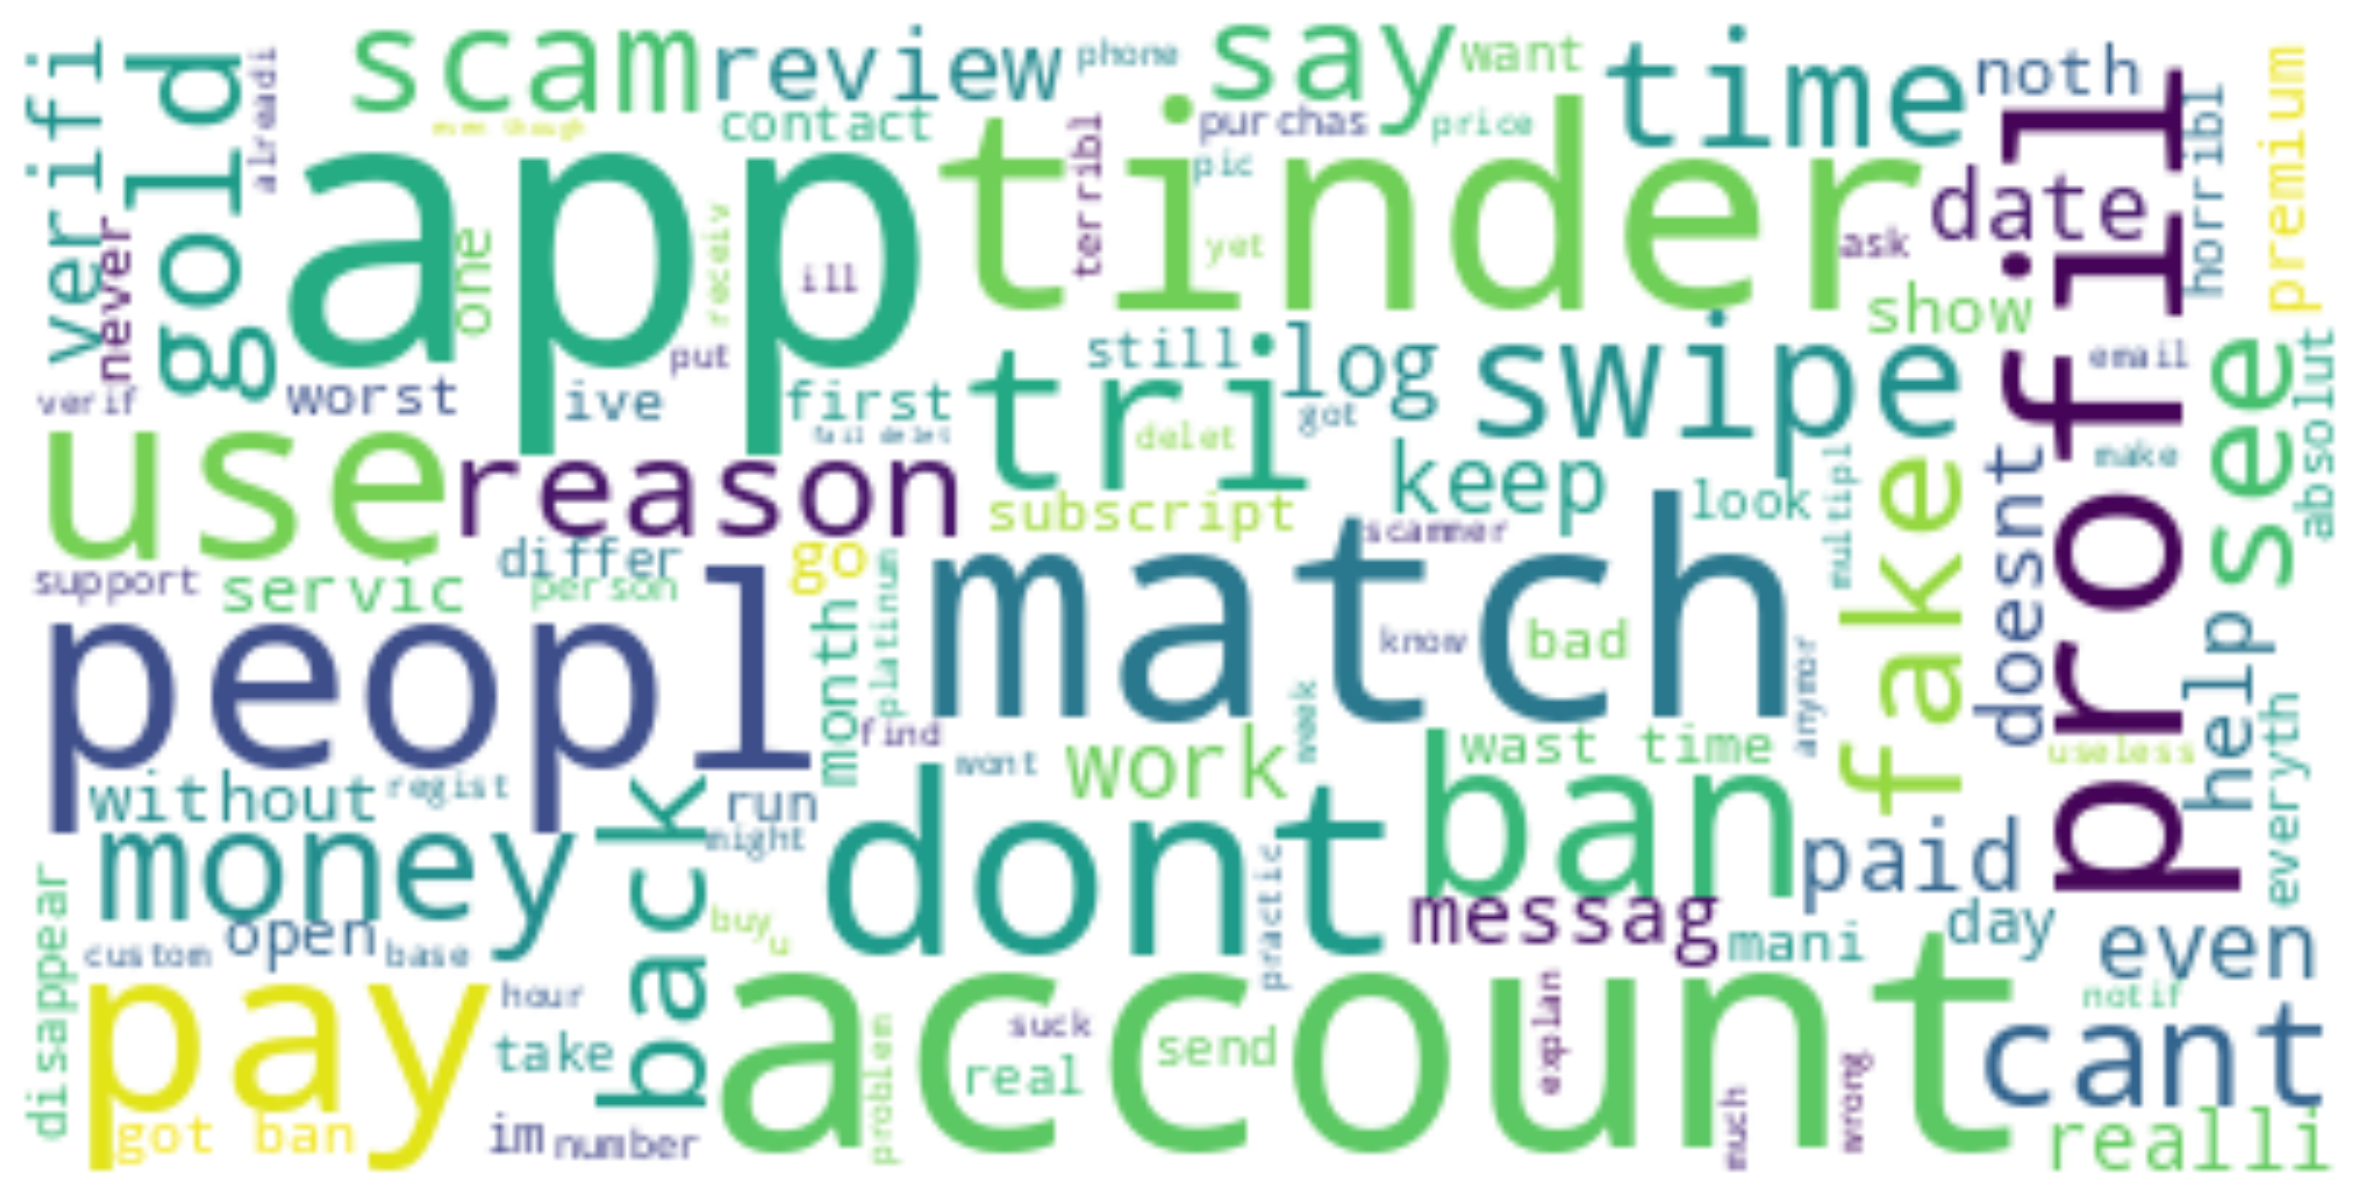

In [14]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s have a look at the overall sentiment score of the users of Tinder:



In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the users write reviews neutrally. Let’s have a look at the total of all the sentiment scores:

In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  46.586
Negative:  25.858999999999995
Neutral:  123.55199999999996


As you can see, the positive is much more than the negative, we can say that most users are happy with Tinder.

# Project Summary

In this project, we analyzed the sentiment of Tinder users based on their reviews. We aimed to understand the overall sentiment towards the app by categorizing user reviews into three categories: Positive, Negative, and Neutral. The analysis was conducted on a dataset containing user reviews, with each review scored under these three sentiment categories.

## Methodology

1. **Data Collection**: The dataset comprised user reviews with sentiment scores in three categories: Positive, Negative, and Neutral.
2. **Sentiment Analysis**: We calculated the sum of each sentiment category across all reviews to understand the overall sentiment.
3. **Sentiment Score Calculation**: A custom function was used to determine the dominant sentiment by comparing the sums of each category.

## Findings

- The sentiment analysis revealed that the majority of users expressed a Neutral sentiment towards Tinder, indicating a balanced view.
- Despite the prevalence of Neutral reviews, the Positive sentiment score was significantly higher than the Negative, suggesting that a substantial portion of users are satisfied with the app.
- The detailed sentiment scores were as follows:
  - Positive: A significant number, indicating many users have had positive experiences.
  - Negative: A smaller number in comparison to Positive, showing fewer users have had negative experiences.
  - Neutral: The highest count, reflecting a majority of users with a neutral stance towards the app.

## Conclusion

The sentiment analysis of Tinder user reviews indicates a generally positive reception of the app, with a significant number of users expressing satisfaction. The high number of Neutral reviews suggests that while many users are content with the app, there are areas of the user experience that might not evoke strong feelings, either positive or negative. This analysis provides valuable insights into user sentiment and can help guide improvements to enhance user satisfaction.